# Titanic Dataset 

| Attribute | Description |
| :--- | :--- |
| **survived** | Survival (1 = Yes, 0 = No) |
| **pclass** | Ticket class (1, 2, or 3) |
| **sex** | Gender (male, female) |
| **age** | Age in years |
| **sibsp** | Siblings/spouses aboard |
| **parch** | Parents/children aboard |
| **fare** | Fare paid |
| **embarked** | Embarkation port (C = Cherbourg, Q = Queenstown, S = Southampton) |
| **class** | Class (same as pclass) |
| **who** | Description of gender (man, woman, child) |
| **adult_male** | Adult male (1 = Yes, 0 = No) |
| **deck** | Deck of the cabin |
| **embark_town** | Town of embarkation |
| **alive** | Survival status (yes, no) |
| **alone** | Traveling alone (1 = Yes, 0 = No) |

In [4]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Dataset in seaborn

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# Impute null
df['age'] = df['age'].fillna(df['age'].median())

<Axes: xlabel='class', ylabel='survived'>

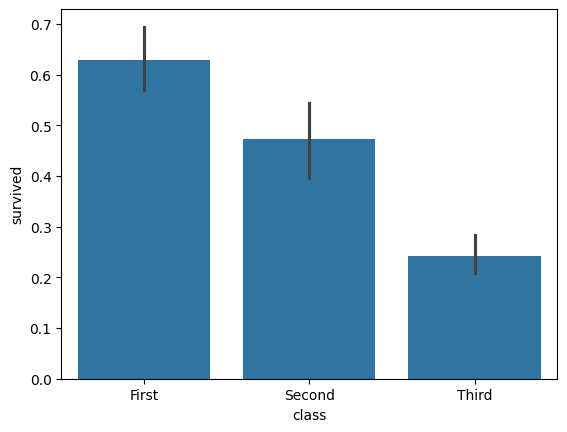

In [9]:
sns.barplot(x = 'class', y='survived', data = df)

In [10]:
# drop unwated col
df = df.drop(columns=['class','who','deck','adult_male','embark_town','alive','alone'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
# Encoding - Label
from sklearn.preprocessing import LabelEncoder

# init le for cate col
label_encoder = {}
le = LabelEncoder()

for col in ['sex','embarked']:
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoder[col] =le

In [12]:
label_encoder

{'sex': LabelEncoder(), 'embarked': LabelEncoder()}

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [14]:
# Feature Selection
X = df.drop('survived',axis=1)
y = df['survived']  # target

In [15]:
# Split the for train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=26)


In [16]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
from sklearn.metrics import accuracy_score
y_pred = dt_clf.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred))

accuracy_score :  0.7985074626865671


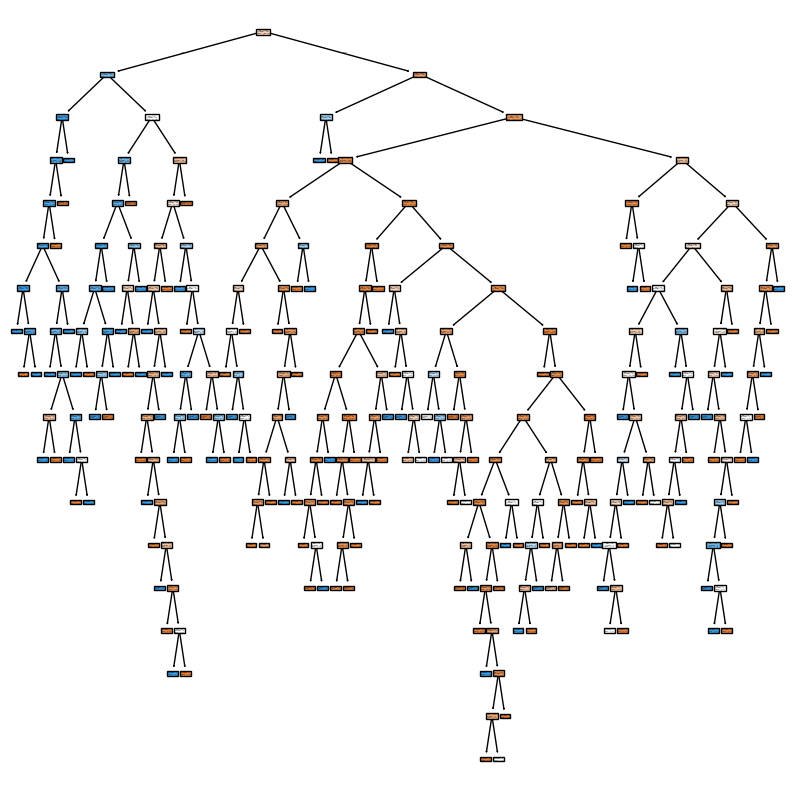

In [18]:
# Plot the Tree
plt.figure(figsize=(10,10))
plot_tree(dt_clf,filled = True, feature_names=X.columns)
plt.show()

### Pruning the Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred))

accuracy_score :  0.7947761194029851


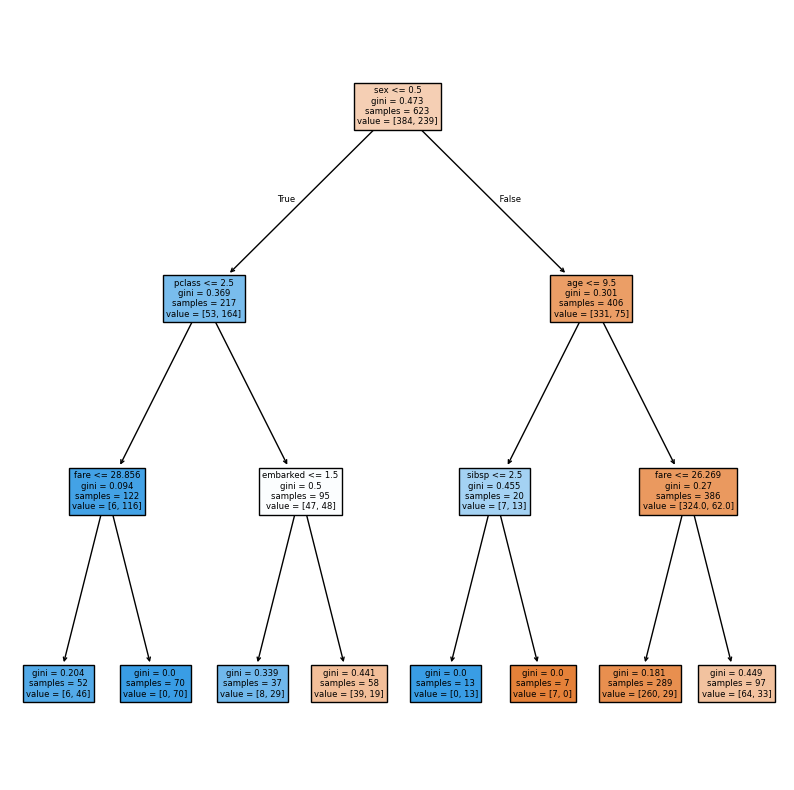

In [20]:
# Plot the Pruning Tree
plt.figure(figsize=(10,10))
plot_tree(dt_clf,filled = True, feature_names=X.columns)
plt.show()

In [21]:
# max depth = 5
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7985074626865671

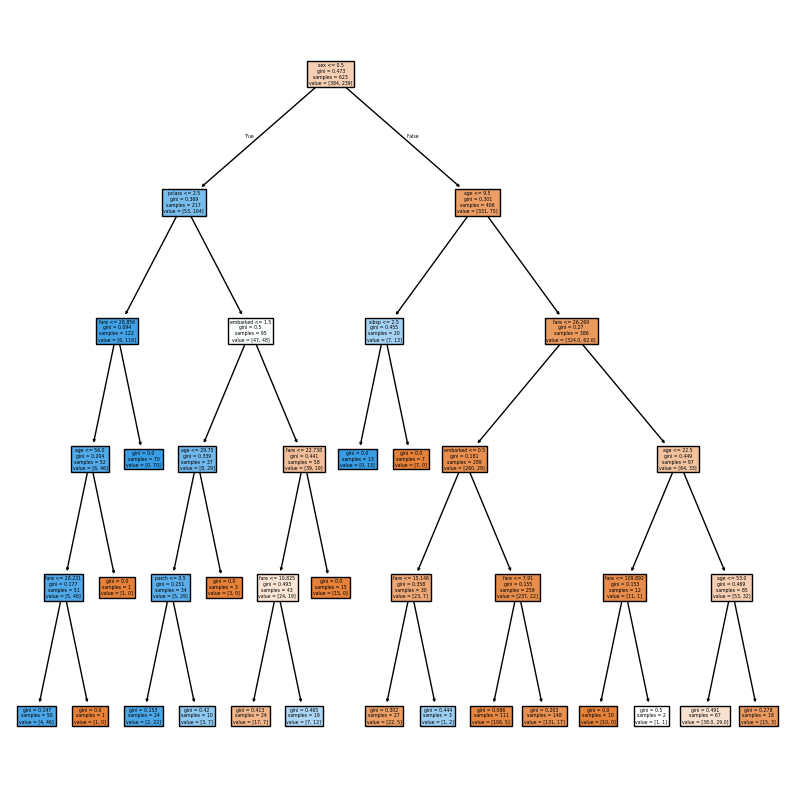

In [22]:
# Plot the Pruning Tree
plt.figure(figsize=(10,10))
plot_tree(dt_clf,filled = True, feature_names=X.columns)
plt.show()

In [23]:
# Change max depth range (2,8)

accuracy = []

for md in range(2,8):
    dt_clf = DecisionTreeClassifier(max_depth= md)
    dt_clf.fit(X_train, y_train)
    acc = dt_clf.score(X_test, y_test)
    accuracy.append(acc)
    print(f"For Max_depth : {md} , Accuracy : {acc:.4f}")
    

For Max_depth : 2 , Accuracy : 0.7687
For Max_depth : 3 , Accuracy : 0.7948
For Max_depth : 4 , Accuracy : 0.7985
For Max_depth : 5 , Accuracy : 0.7985
For Max_depth : 6 , Accuracy : 0.7836
For Max_depth : 7 , Accuracy : 0.7910


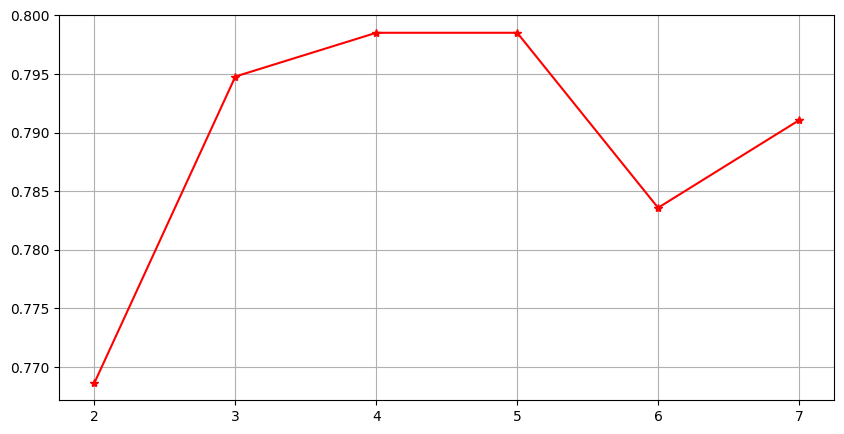

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(2,8), accuracy, color='r', marker='*' )
plt.xticks(range(2,8))
plt.grid(True)
plt.show()

In [25]:
# max depth = 5 is higer accurecy
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)


0.7985074626865671

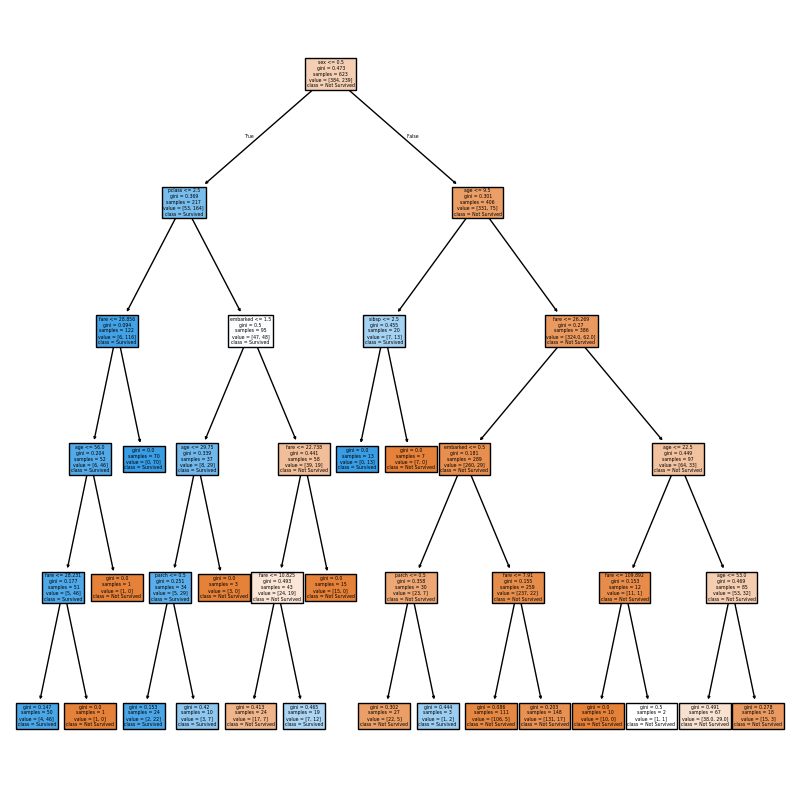

In [26]:
# Plot the Pruning Tree
plt.figure(figsize=(10,10))
plot_tree(dt_clf,filled = True, feature_names=X.columns,class_names=['Not Survived', 'Survived'] )
plt.show()